In [145]:
import numpy as np
import matplotlib.pyplot as plt
import requests, gzip, os, hashlib

# Preprocessing

2 blocks of code below were taken from the internet from this link - https://towardsdatascience.com/mnist-handwritten-digits-classification-from-scratch-using-python-numpy-b08e401c4dab

To get the data as regular format

In [146]:
def fetch(url):
    fp = os.path.join(hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [147]:
X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [148]:
images = X.reshape(60000,28*28)/255
labels = np.eye(10)[y]
images_test = X_test.reshape(10000,28*28)/255
labels_test = np.eye(10)[y]

W1 = np.random.uniform(-0.5, 0.5, (32, 784))
W2 = np.random.uniform(-0.5, 0.5, (10, 32))
b1 = np.zeros((32, 1))
b2 = np.zeros((10, 1))

alpha = 0.01
epochs = 32
correct_pred = 0

# Training

In [149]:
for epoch in range(epochs):
    for img, l in zip(images, labels):
        
        img.shape += (1,)
        l.shape += (1,)
        
        # Forward propagation
        z1 = np.dot(W1, img) +b1
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(W2, a1) + b2
        a2 = 1 / (1 + np.exp(-z2))
        
        correct_pred += int(np.argmax(a2) == np.argmax(l))
        
        # Backpropagation
        delta3 = a2 - l
        W2 += -alpha * np.dot(delta3 , np.transpose(a1))
        b2 += -alpha * delta3
        delta2 = np.dot(np.transpose(W2) , delta3) * (a1 * (1 - a1))
        W1 += -alpha * np.dot(delta2 , np.transpose(img))
        b1 += -alpha * delta2

    print('Accuracy : ',(correct_pred / images.shape[0]) * 100)
    correct_pred = 0

Accuracy :  87.56166666666667
Accuracy :  93.00166666666667
Accuracy :  94.16333333333333
Accuracy :  94.88333333333333
Accuracy :  95.39833333333333
Accuracy :  95.78999999999999
Accuracy :  96.03833333333334
Accuracy :  96.30833333333332
Accuracy :  96.50333333333333
Accuracy :  96.66
Accuracy :  96.83166666666668
Accuracy :  96.995
Accuracy :  97.11
Accuracy :  97.205
Accuracy :  97.31333333333333
Accuracy :  97.40333333333334
Accuracy :  97.48166666666667
Accuracy :  97.57833333333333
Accuracy :  97.65833333333333
Accuracy :  97.73333333333333
Accuracy :  97.77833333333334
Accuracy :  97.84666666666666
Accuracy :  97.90666666666667
Accuracy :  97.97166666666666
Accuracy :  98.04833333333333
Accuracy :  98.085
Accuracy :  98.13333333333333
Accuracy :  98.19
Accuracy :  98.24833333333333
Accuracy :  98.27666666666667
Accuracy :  98.30833333333334
Accuracy :  98.33833333333334


#   Test

Predicted value : 7
Label value : 5


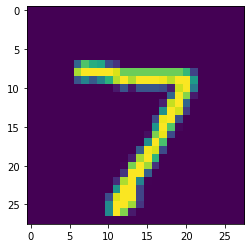

Predicted value : 2
Label value : 0


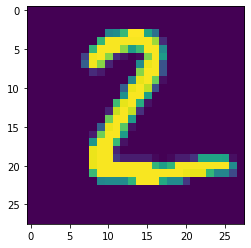

Predicted value : 1
Label value : 4


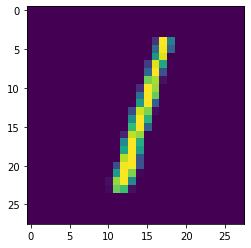

Predicted value : 0
Label value : 1


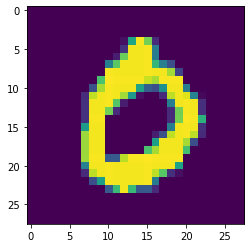

Predicted value : 4
Label value : 9


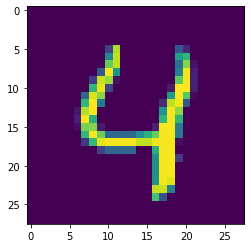

Predicted value : 1
Label value : 2


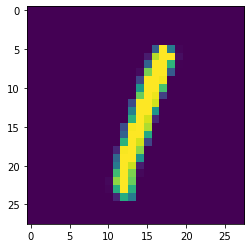

Predicted value : 4
Label value : 1


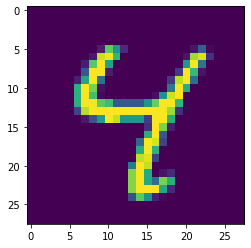

Predicted value : 9
Label value : 3


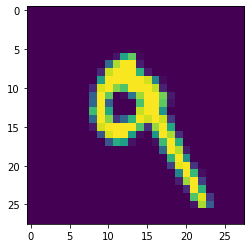

Predicted value : 5
Label value : 1


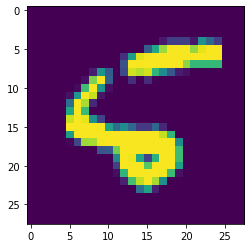

Predicted value : 9
Label value : 4


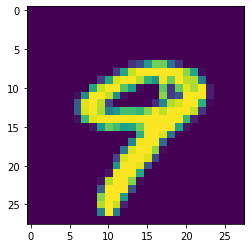

Predicted value : 0
Label value : 3


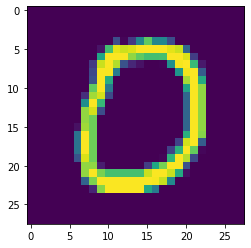

Predicted value : 6
Label value : 5


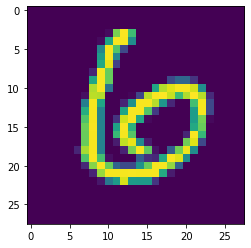

Predicted value : 9
Label value : 3


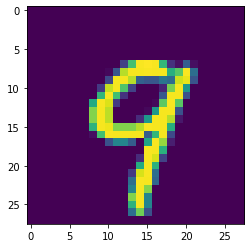

Predicted value : 0
Label value : 6


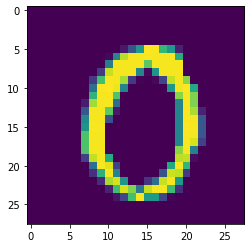

Predicted value : 1
Label value : 1


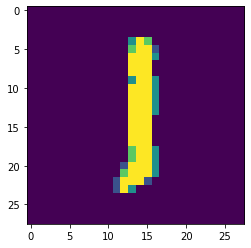

Predicted value : 5
Label value : 7


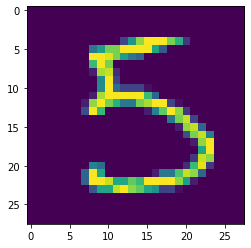

Predicted value : 9
Label value : 2


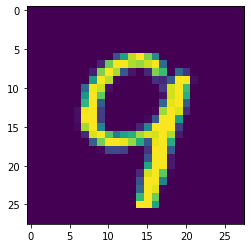

Predicted value : 7
Label value : 8


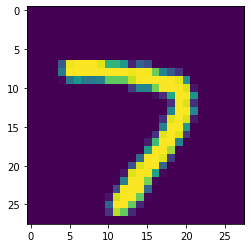

Predicted value : 3
Label value : 6


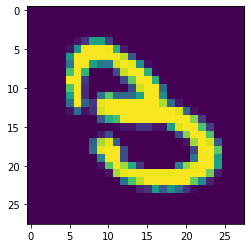

Predicted value : 4
Label value : 9


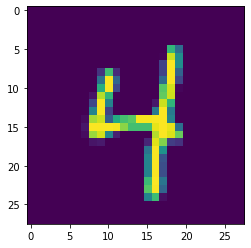

Predicted value : 9
Label value : 4


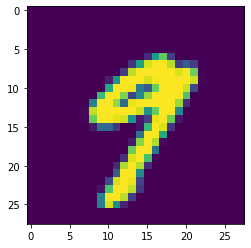

Predicted value : 6
Label value : 0


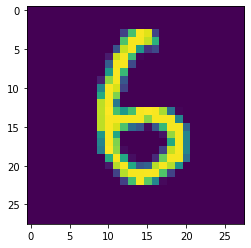

Predicted value : 6
Label value : 9


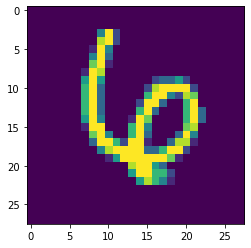

Predicted value : 5
Label value : 1


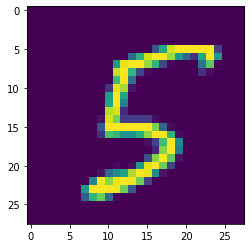

Predicted value : 4
Label value : 1


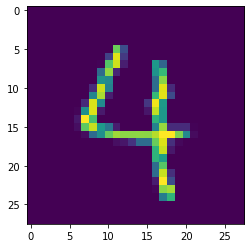

Predicted value : 0
Label value : 2


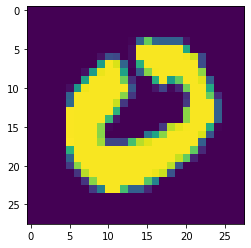

Predicted value : 7
Label value : 4


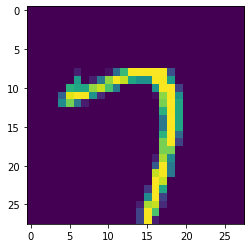

Predicted value : 4
Label value : 3


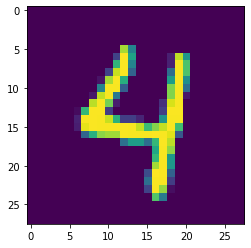

Predicted value : 0
Label value : 2


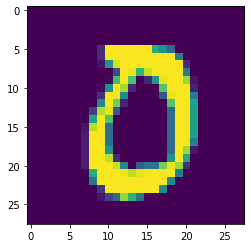

Predicted value : 1
Label value : 7


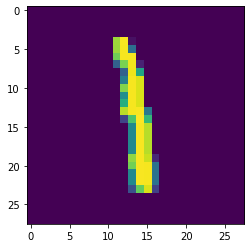

Predicted value : 3
Label value : 3


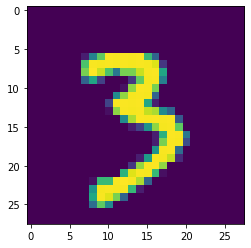

Predicted value : 1
Label value : 8


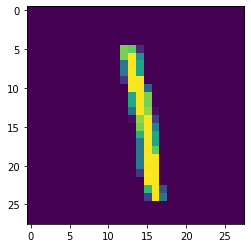

Predicted value : 3
Label value : 6


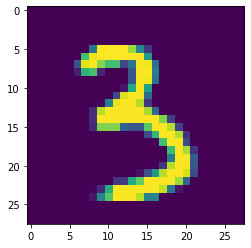

Predicted value : 4
Label value : 9


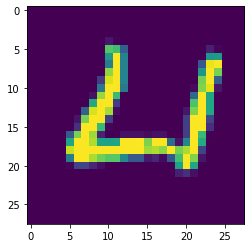

Predicted value : 7
Label value : 0


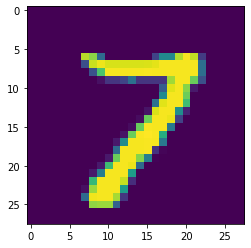

Predicted value : 2
Label value : 5


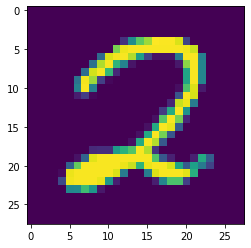

Predicted value : 7
Label value : 6


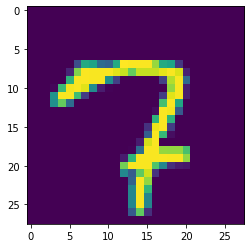

Predicted value : 1
Label value : 0


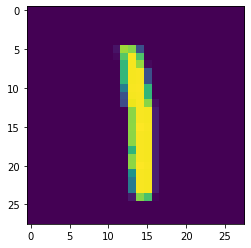

Predicted value : 2
Label value : 7


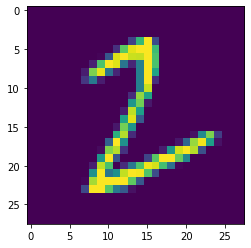

Predicted value : 1
Label value : 6


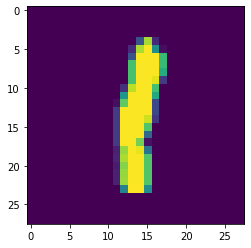

Predicted value : 1
Label value : 1


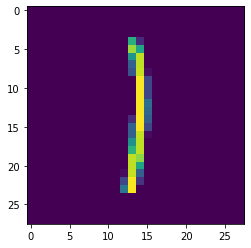

Predicted value : 7
Label value : 8


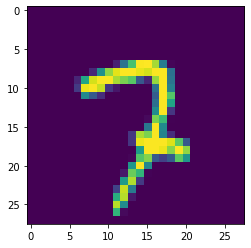

Predicted value : 4
Label value : 7


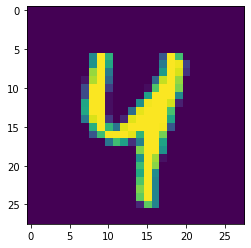

Predicted value : 2
Label value : 9


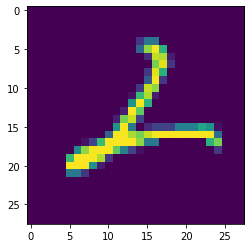

Predicted value : 3
Label value : 3


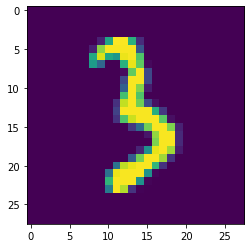

Predicted value : 5
Label value : 9


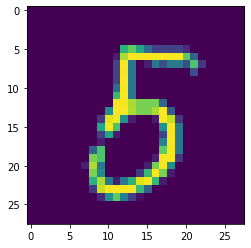

Predicted value : 1
Label value : 8


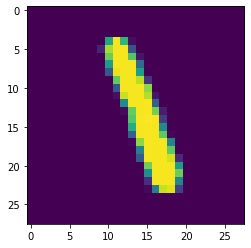

Predicted value : 2
Label value : 5


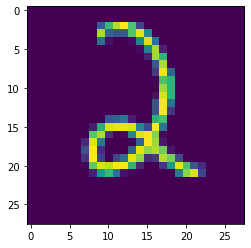

Predicted value : 4
Label value : 9


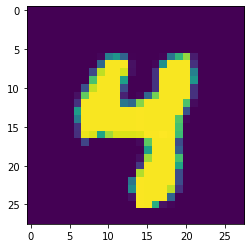

Predicted value : 4
Label value : 3


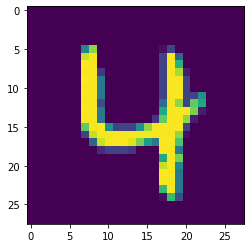

Predicted value : 6
Label value : 3


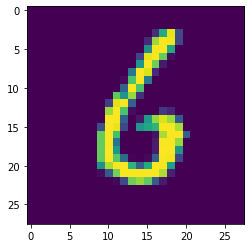

Predicted value : 3
Label value : 0


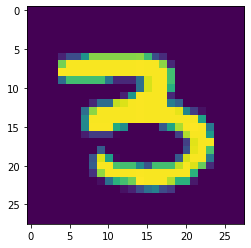

Predicted value : 5
Label value : 7


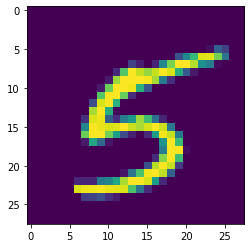

Predicted value : 5
Label value : 4


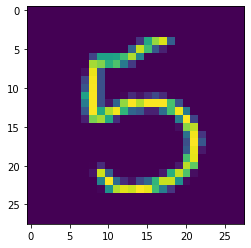

Predicted value : 6
Label value : 9


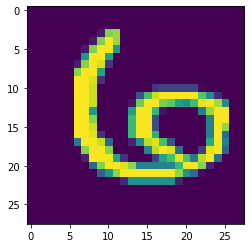

Predicted value : 0
Label value : 8


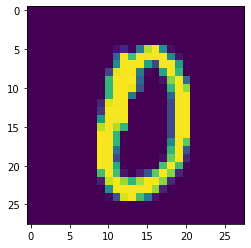

Predicted value : 4
Label value : 0


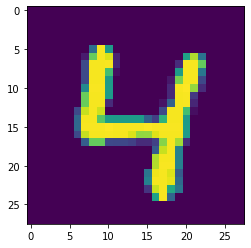

Predicted value : 1
Label value : 9


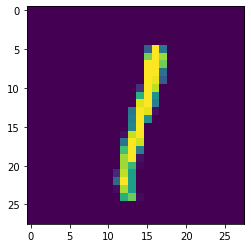

Predicted value : 9
Label value : 4


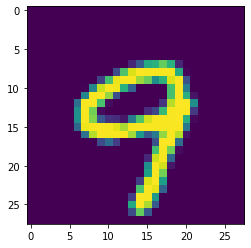

Predicted value : 5
Label value : 1


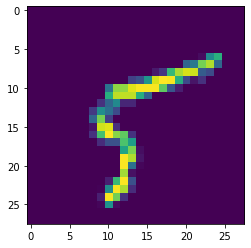

Predicted value : 7
Label value : 4


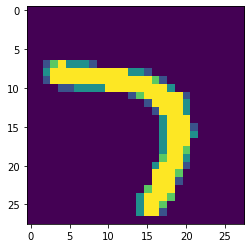

Predicted value : 8
Label value : 4


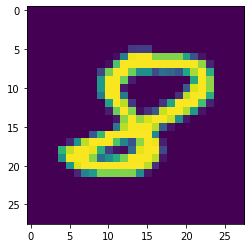

Predicted value : 9
Label value : 6


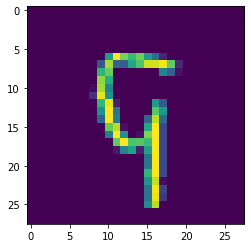

Predicted value : 3
Label value : 0


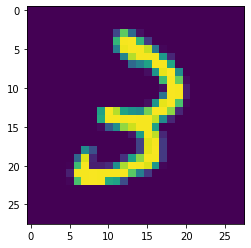

Predicted value : 7
Label value : 4


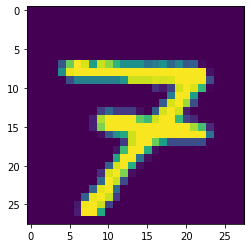

Predicted value : 4
Label value : 5


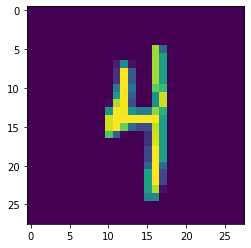

Predicted value : 6
Label value : 6


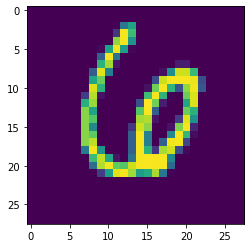

Predicted value : 4
Label value : 1


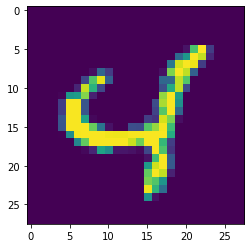

Predicted value : 3
Label value : 0


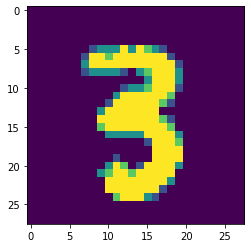

Predicted value : 0
Label value : 0


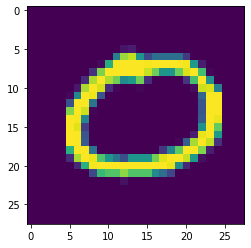

Predicted value : 7
Label value : 1


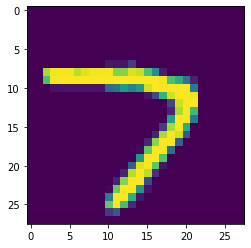

Predicted value : 0
Label value : 7


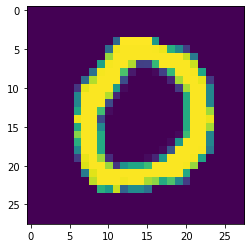

Predicted value : 2
Label value : 1


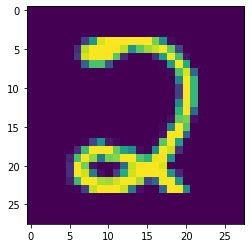

Predicted value : 9
Label value : 6


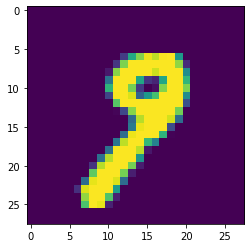

Predicted value : 1
Label value : 3


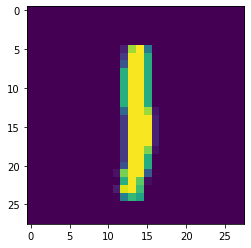

Predicted value : 7
Label value : 0


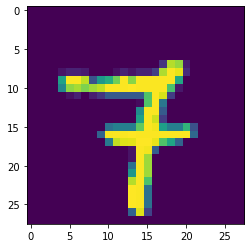

Predicted value : 3
Label value : 2


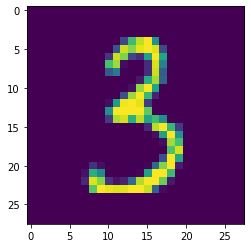

Predicted value : 2
Label value : 1


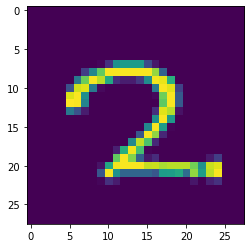

Predicted value : 9
Label value : 1


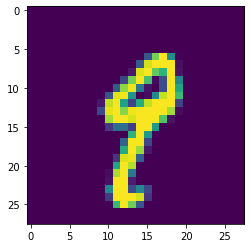

Predicted value : 7
Label value : 7


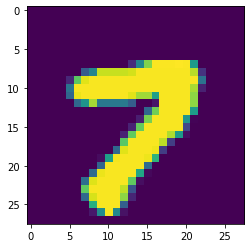

Predicted value : 7
Label value : 9


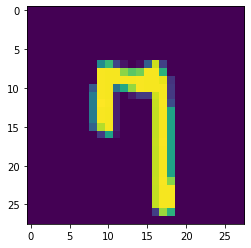

Predicted value : 6
Label value : 0


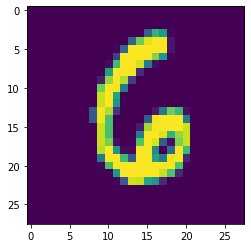

Predicted value : 2
Label value : 2


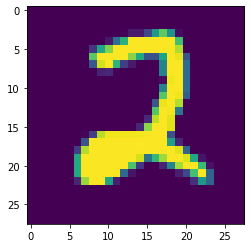

Predicted value : 7
Label value : 6


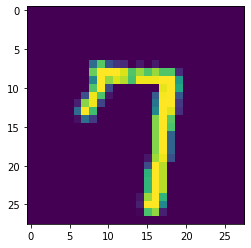

Predicted value : 8
Label value : 7


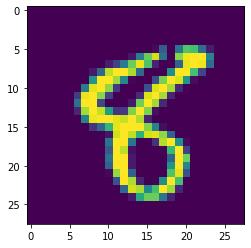

Predicted value : 4
Label value : 8


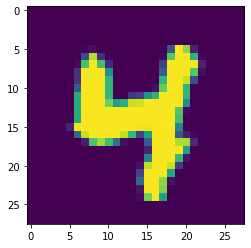

Predicted value : 7
Label value : 3


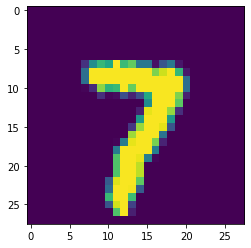

Predicted value : 3
Label value : 9


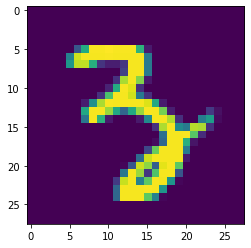

Predicted value : 6
Label value : 0


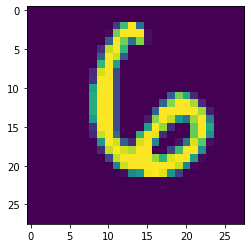

Predicted value : 1
Label value : 4


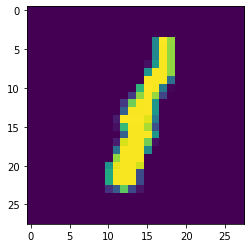

Predicted value : 3
Label value : 6


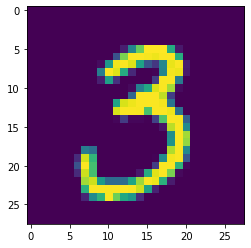

Predicted value : 6
Label value : 7


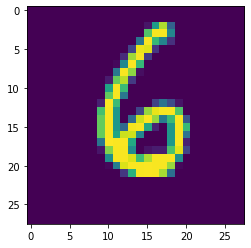

Predicted value : 9
Label value : 4


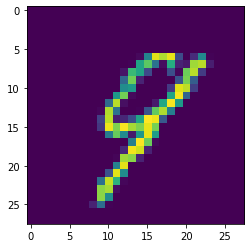

Predicted value : 3
Label value : 6


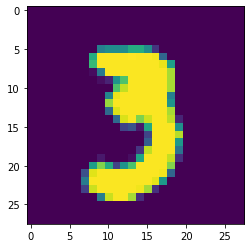

Predicted value : 1
Label value : 8


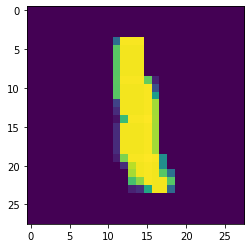

Predicted value : 4
Label value : 0


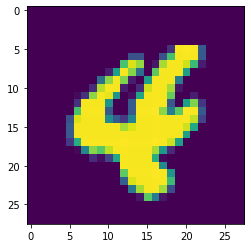

Predicted value : 1
Label value : 7


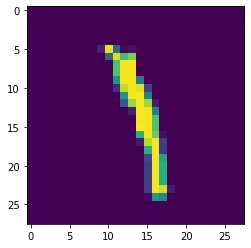

Predicted value : 7
Label value : 8


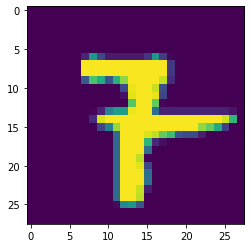

Predicted value : 6
Label value : 3


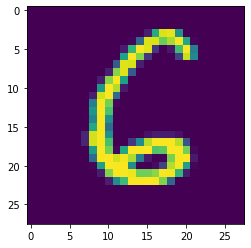

Predicted value : 9
Label value : 1


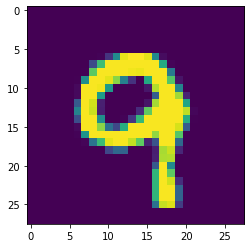

In [150]:
for i in range(100):
    img = images_test[i]
    l = labels_test[i]
    plt.imshow(img.reshape(28, 28))
    img.shape += (1,)
    l.shape +=(1,)
    
    z1 = b1 + np.dot(W1 , img.reshape(784, 1))
    a1 = 1 / (1 + np.exp(-z1))
    z2 = b2 + np.dot(W2 , a1)
    a2 = 1 / (1 + np.exp(-z2))
 
    print('Predicted value :', a2.argmax())
    print('Label value :', l.argmax())
    plt.show()

Conclusion:

Accuracy in the training set was 98.33%.

Problems:

But when mapping the label values with the images, the results were not matching. So for tshowing the results 3 things were shown.

1) Predicted value

2) label value

3) image

Both predicted and images are matching, but label values are not matching.